In [ ]:
i = 0
for epicID in r['KIC/EPIC'][0:10]:
    u = pipeline.analyze(pipeline.getQuery(str(epicID),"0"))
    c = pipeline.analyze(pipeline.getEBQuery(str(epicID),"0"))
    arr = [u.response['peaks'][0],c.response['peaks'][0]]
    print(str(epicID) + ": period of " + str(r['period'][i]))
    print("               u    c")
    for y in arr[0]:
        print("{0:>10s} {1:>6.2f} {2:>6.2f}".\
              format(y.rjust(10),arr[0][y], arr[1][y]))
    i+=1

In [3]:
from __future__ import division, print_function

%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["font.size"] = 20
import h5py
import transit
import numpy as np
import matplotlib.pyplot as pl
from matplotlib.ticker import MaxNLocator
import ketu
import urllib2
import sys
from astropy.io import fits
from astropy.io import ascii
#from eliminate_eclipse import *
import pipeline
from eliminate_eclipses import *

In [4]:
r = ascii.read("/k2_data/c0_EB")

In [5]:
for epicid in r['KIC/EPIC']:
    pipeline.analyze(pipeline.getQuery(str(epicid),"0"))
    pipeline.analyze(pipeline.getEBQuery(str(epicid),"0"))

Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in Likelihood
Querying OneDSearch
Finished querying OneDSearch in 57.74s
Querying IterativeTwoDSearch
Finished querying IterativeTwoDSearch i

In [14]:
def load(epicid):
    un = pipeline.analyze(pipeline.getQuery(epicid,"0"))
    cl = pipeline.analyze(pipeline.getEBQuery(epicid,"0"))
    return un, cl

In [176]:
150 * 3  / 60

7.5

In [171]:
un, cl = load('202093968')

Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch


In [172]:
un.response

{'peaks': [{'depth': 4.530570146321125,
   'depth_ivar': 684.2074935196249,
   'duration': 0.10000000000000001,
   'period': 4.942812493926386,
   's2n': 118.50775530551154,
   't0': 1.133461816884676}]}

In [174]:
r[r['KIC/EPIC'] == 202093968]

KIC/EPIC,Campaign,period,period error,bjd0,pdepth,sdepth,pwidth,swidth,sep
int32,string40,float64,float64,float64,float64,float64,float64,float64,float64
202093968,K2C0,2.4699998,0.0008402,56774.554275,0.0107,0.0011,0.042,0.125,0.461


In [58]:
analysis = []
for name in r['KIC/EPIC']:
    u, c = load(str(name))
    u = u.response['peaks'][0]
    analysis.append([str(name),u['depth'], u['depth_ivar'], u['duration'],u['period'],u['s2n'],u['t0']])
    #                 c.response['peaks'][0]['period'],c.response['peaks'][0]['s2n']])
    #analysis.append([str(name),u.response['peaks'][0]['period'],u.response['peaks'][0]['s2n'],\
    #                 c.response['peaks'][0]['period'],c.response['peaks'][0]['s2n']])

Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwo

In [60]:
analysis = np.array(analysis,dtype=np.float)

In [38]:
col = lambda b: "red" if b else "black"

In [41]:
analysis[:,2] > 15

array([False, False, False, False, False, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

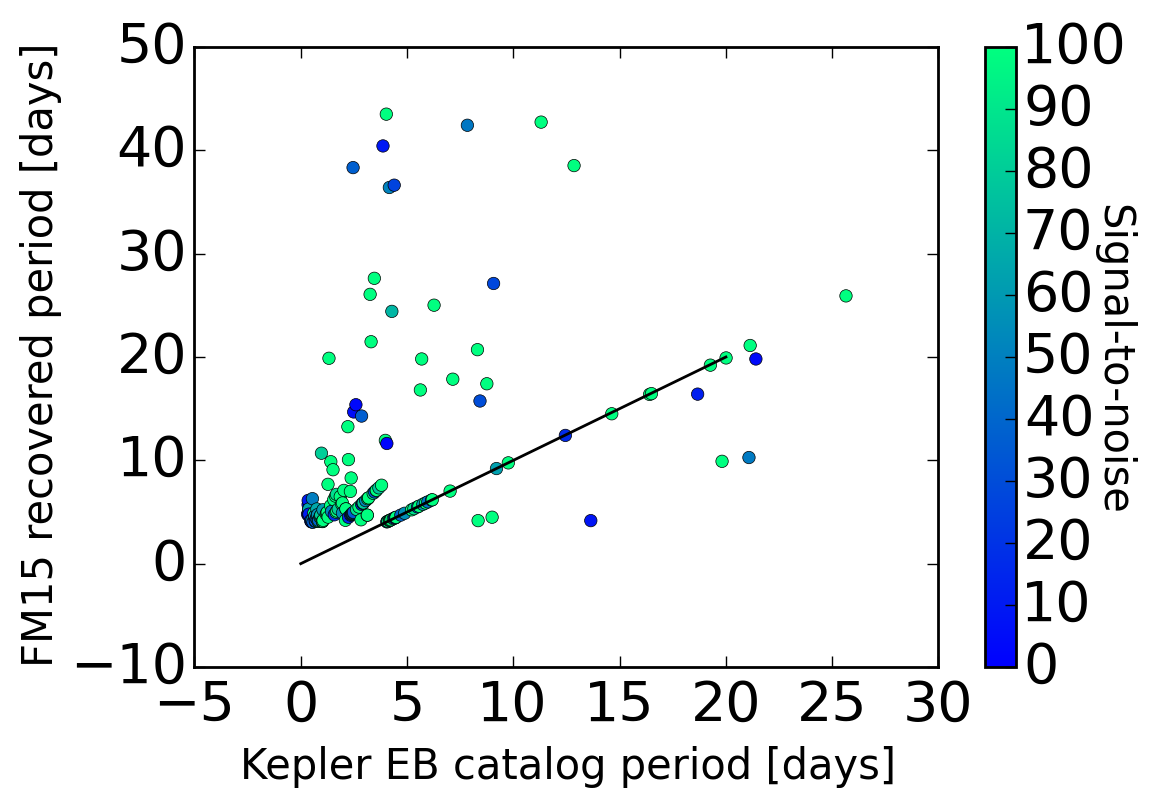

In [160]:
pl.plot(np.linspace(0,20,10),np.linspace(0,20,10), 'k')
pl.scatter(r['period'],analysis[:,4],c= (analysis[:,5]),cmap='winter',lw=0.25)
pl.clim(0,100)
#pl.ylim(0,50)
#pl.xlim(0,50)
#pl.colorbar()
cbar = pl.colorbar()
#cbar.ax.set_yticklabels(fontsize=10)
cbar.set_label('Signal-to-noise', rotation=270,fontsize=15)
pl.xlabel("Kepler EB catalog period [days]",fontsize=15)
pl.ylabel("FM15 recovered period [days]",fontsize=15)
pl.show()

In [170]:
r['KIC/EPIC'][((analysis[:,4]/r['period']) > 1.8) * ((analysis[:,4]/r['period']) <2.2)]

202072061
202073262
202073067
202137209
202073438
202073063
202094234
202086291
202093968
202073061
202073440


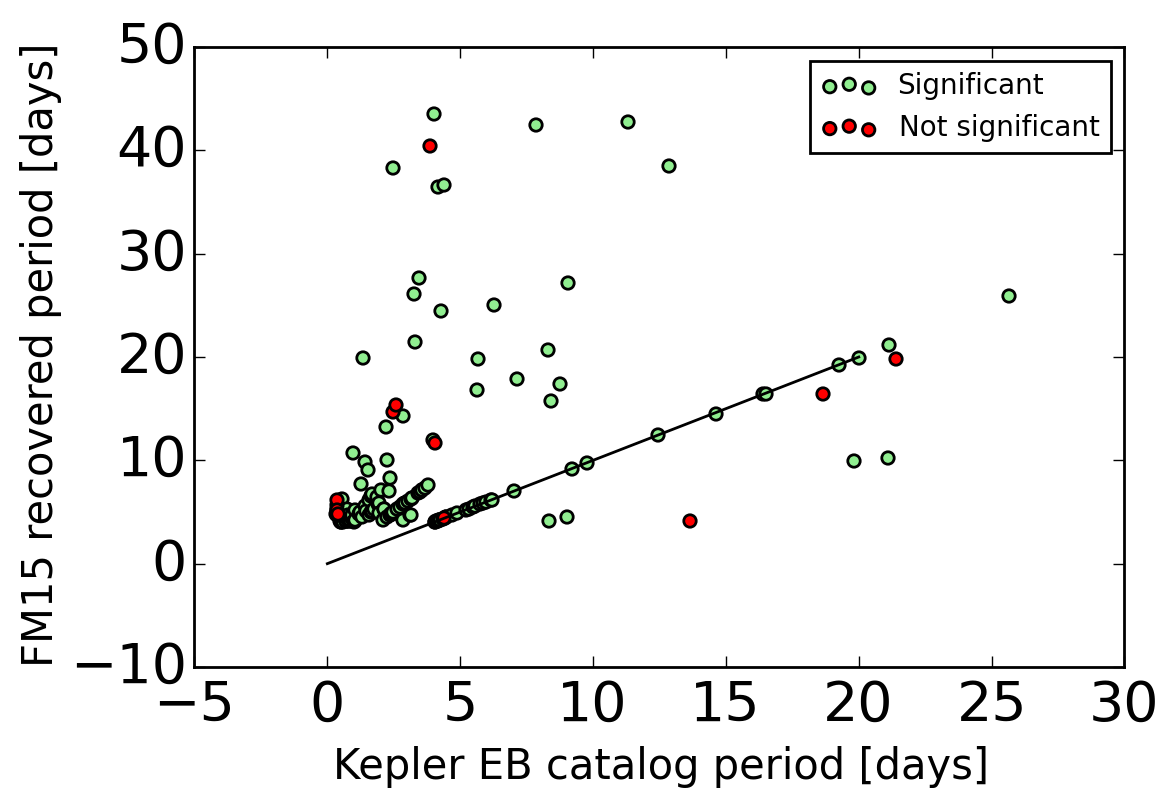

In [155]:
m = analysis[:,5]>15
pl.plot(np.linspace(0,20,10),np.linspace(0,20,10), 'k')
pl.scatter(r['period'][m],analysis[:,4][m],c="lightgreen",label="Significant")
pl.scatter(r['period'][np.logical_not(m)],analysis[:,4][np.logical_not(m)],c="red",label="Not significant")
pl.legend(fontsize=10)
#pl.clim(0,100)
#pl.ylim(0,50)
#pl.xlim(0,50)
#pl.colorbar()
#cbar = pl.colorbar()
#cbar.ax.set_yticklabels(fontsize=10)
cbar.set_label('Signal-to-noise', rotation=270,fontsize=15)
pl.xlabel("Kepler EB catalog period [days]",fontsize=15)
pl.ylabel("FM15 recovered period [days]",fontsize=15)
pl.show()

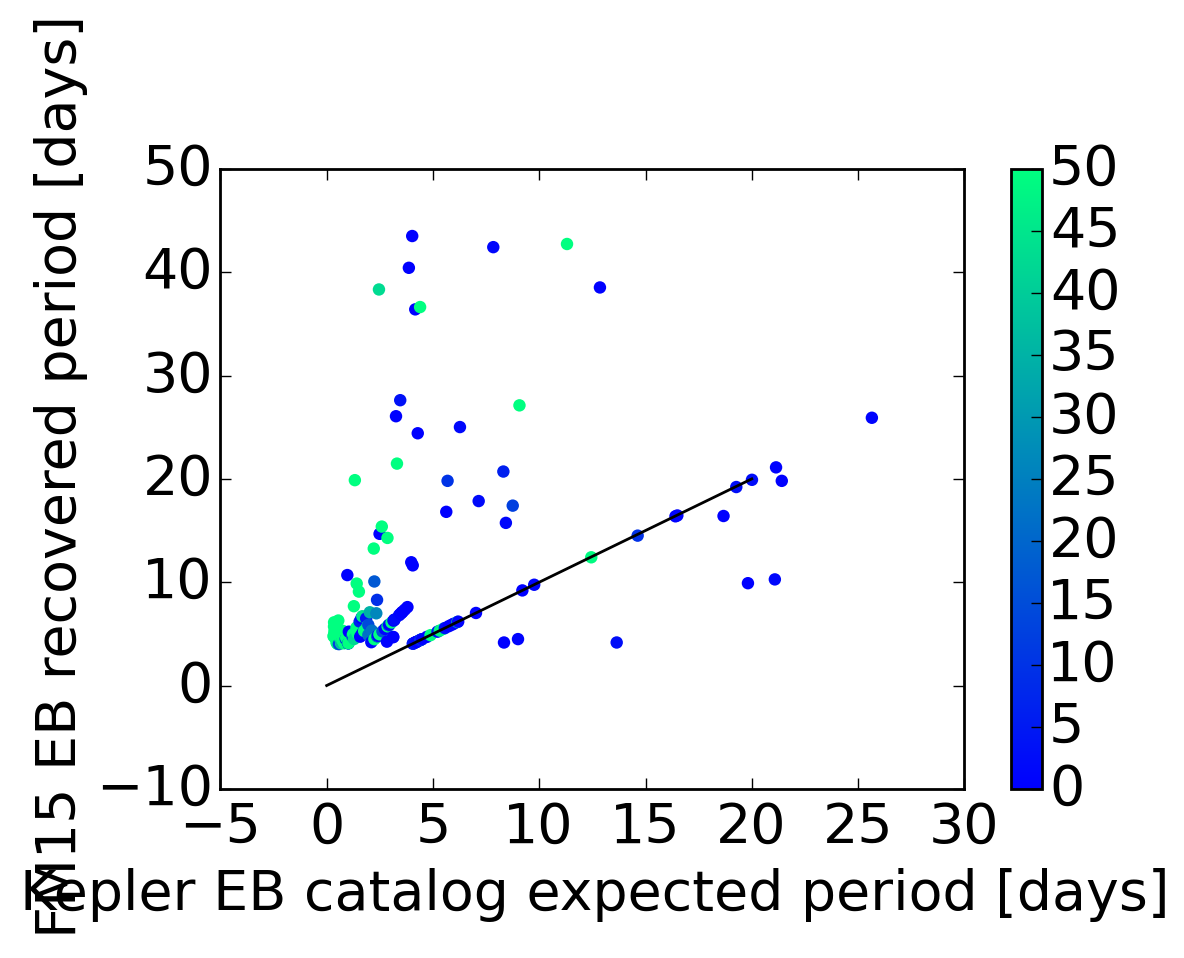

In [80]:
pl.plot(np.linspace(0,20,10),np.linspace(0,20,10), 'k')
pl.scatter(r['period'],analysis[:,4],c= (analysis[:,1]/analysis[:,2]),cmap='winter',lw=0)
pl.clim(0,50)
pl.colorbar()
pl.xlabel("Kepler EB catalog expected period [days]")
pl.ylabel("FM15 EB recovered period [days]")
pl.show()

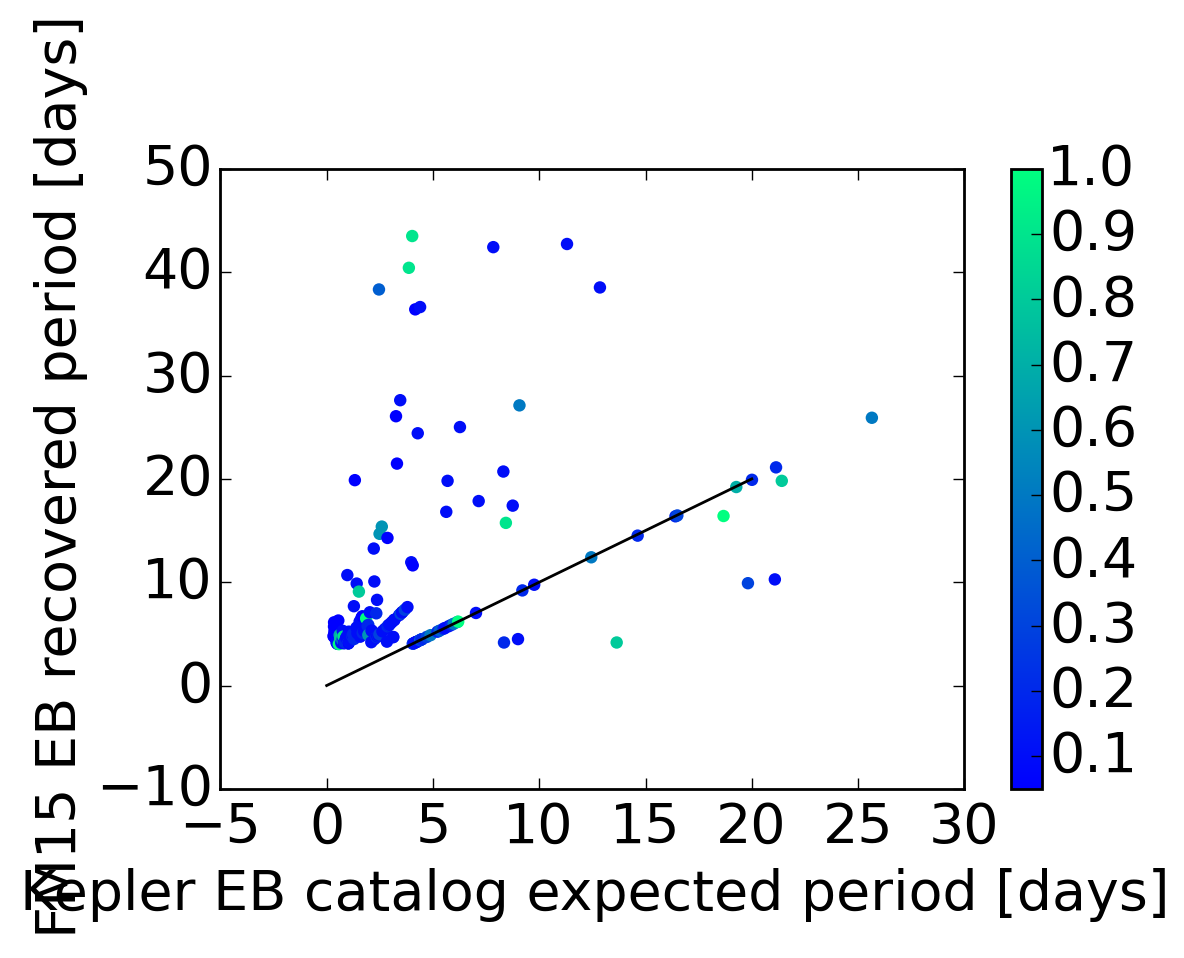

In [75]:
pl.plot(np.linspace(0,20,10),np.linspace(0,20,10), 'k')
pl.scatter(r['period'],analysis[:,4],c= (analysis[:,3]),cmap='winter',lw=0)
#pl.clim(0,100)
pl.colorbar()
pl.xlabel("Kepler EB catalog expected period [days]")
pl.ylabel("FM15 EB recovered period [days]")
pl.show()

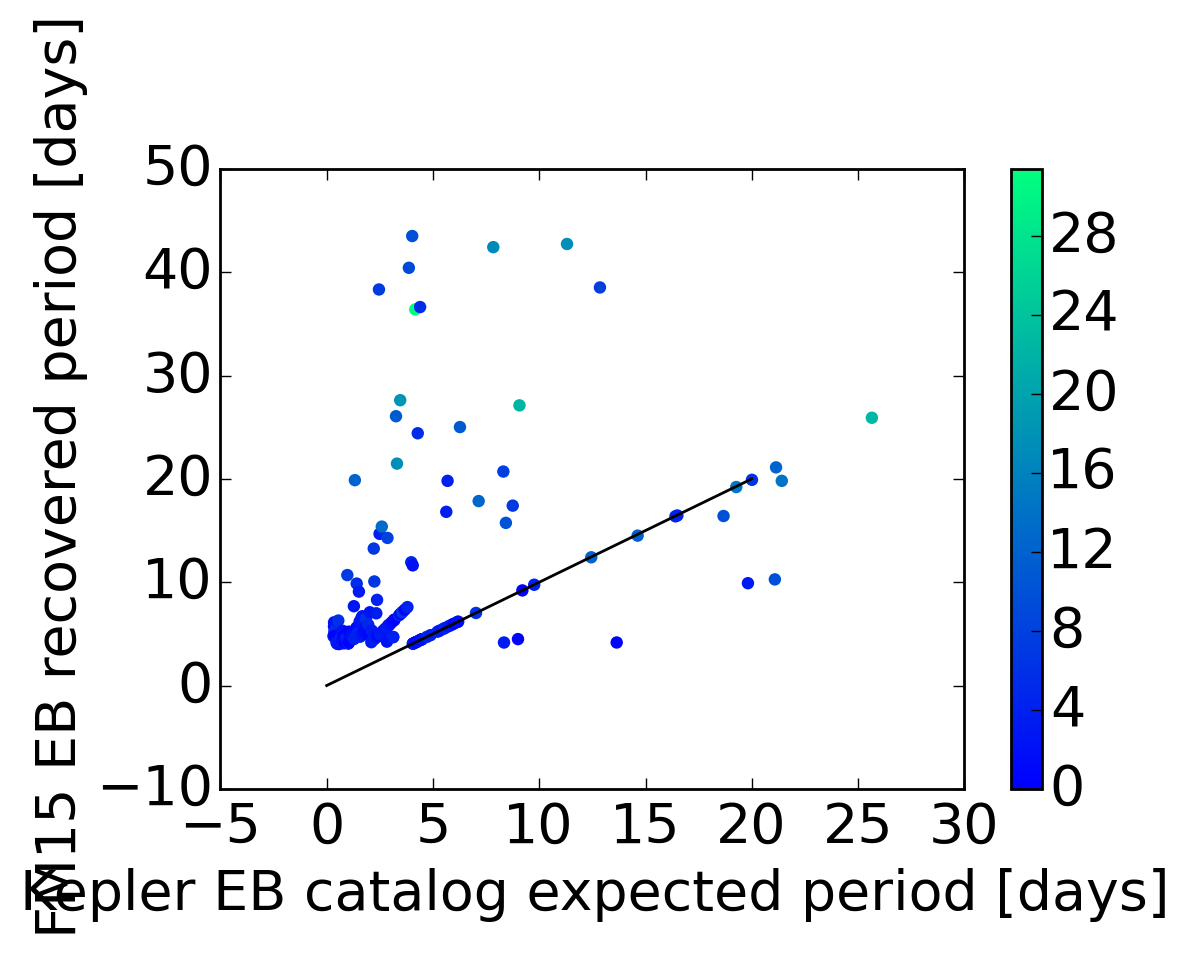

In [122]:
pl.plot(np.linspace(0,20,10),np.linspace(0,20,10), 'k')
pl.scatter(r['period'],analysis[:,4],c= (analysis[:,6]),cmap='winter',lw=0)
#pl.clim(0,100)
pl.colorbar()
pl.xlabel("Kepler EB catalog expected period [days]")
pl.ylabel("FM15 EB recovered period [days]")
pl.show()

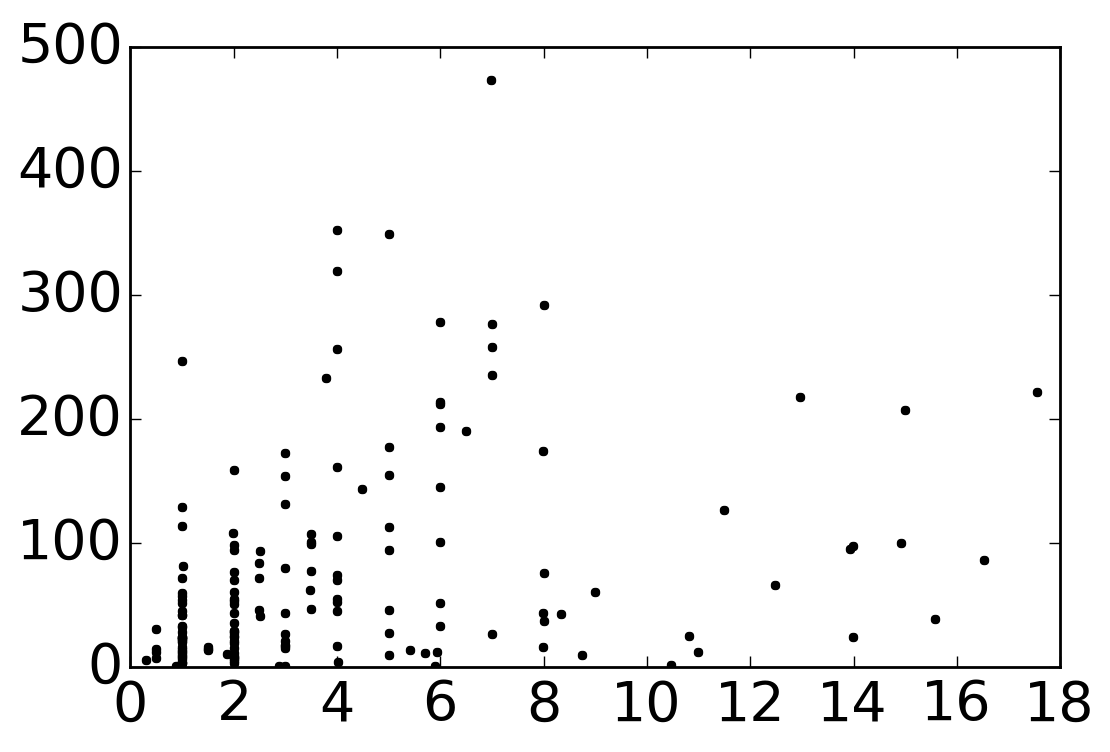

In [85]:
pl.plot(analysis[:,4]/r['period'],analysis[:,1],'k.')

In [89]:
?pl.hist

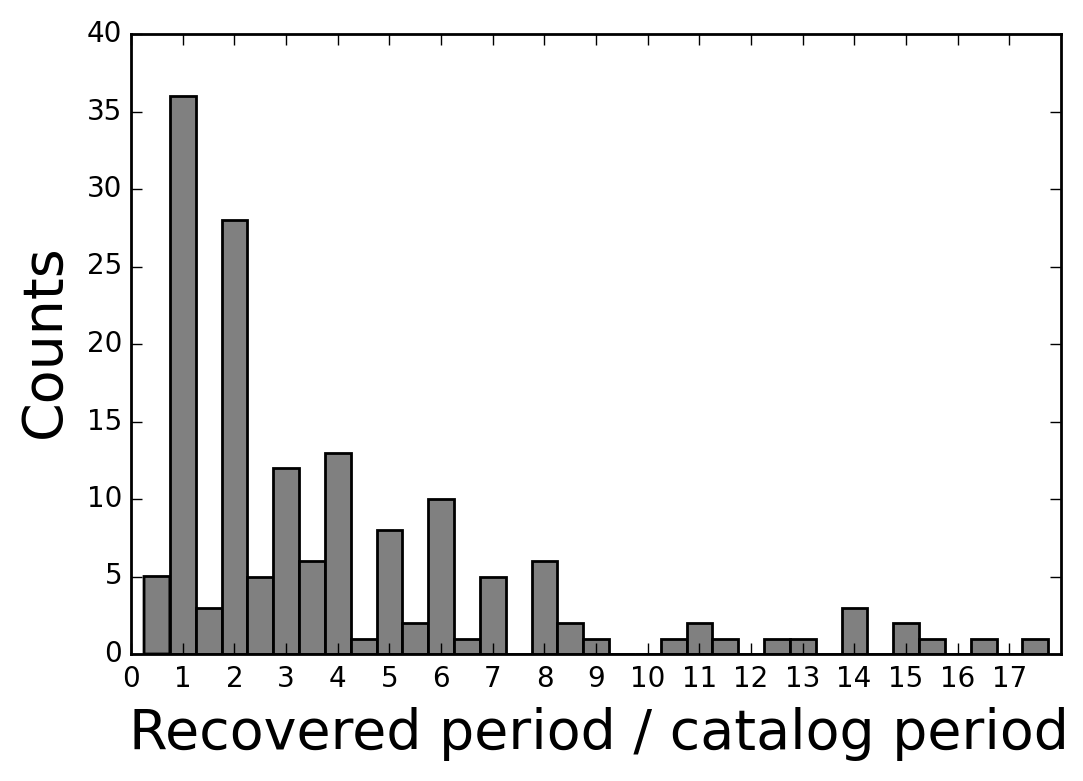

In [121]:
pl.hist(analysis[:,4]/r['period'],np.arange(0,18,0.5)+0.25,color='grey')
pl.xticks(range(0,18),fontsize=10)
pl.yticks(fontsize=10)
pl.ylabel("Counts")
pl.xlabel("Recovered period / catalog period")
pl.show()

In [97]:
print(len(a),len(b))

100 101


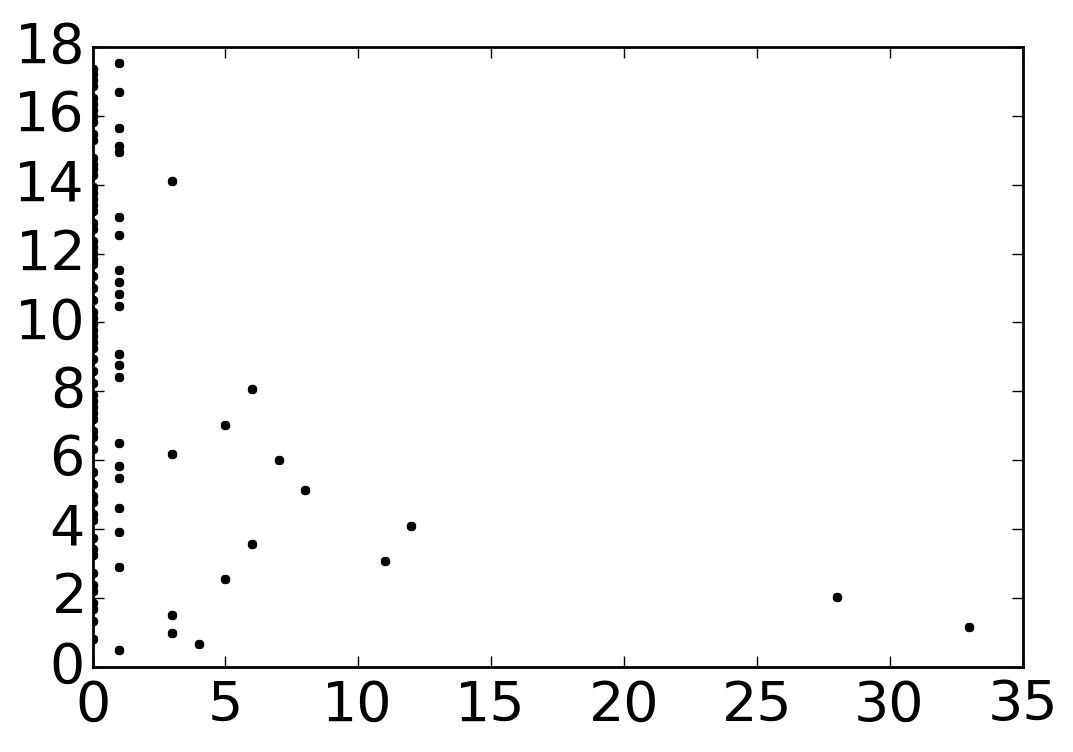

In [99]:
pl.plot(a,b[1:], 'k.')